# Logistic Regression Classifier
The goal of this notebook is to build a logistic regression classifier using a neural network underlying architecture. This model will classify whether an image contains a cat or not.

<a id="cont"></a>

## Notebook Structure:

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Dataset</a>

<a href=#three>3. Building Functions</a>

<a href=#four>4. Merging Model</a>

 <a id="one"></a>
### 1. Importing Packages


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

 <a id="two"></a>
### 2. Dataset


#### 2.1 - Problem Overview

Given a dataset ("data.h5") containing:
* a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
* a test set of m_test images labeled as cat or non-cat
* each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

Build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

#### 2.2 - Upload Dataset

In [2]:
# upload data 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Change the index value to view other results.

y = [1], a cat picture!


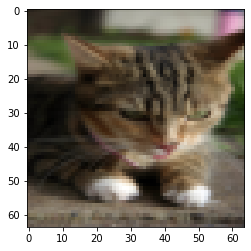

In [3]:
# view an example
index = 104
plt.imshow(train_set_x_orig[index])
print('y = {}, a {} picture!'.format(train_set_y[:, index], classes[np.squeeze(train_set_y[:, index])].decode("utf-8")))

#### 2.3 - Preprocessing 

In [4]:
# view data shape
print('train_set_x_orig = {}'.format(train_set_x_orig.shape))
print('train_set_y = {}'.format(train_set_y.shape))
print('test_set_x_orig = {}'.format(test_set_x_orig.shape))
print('test_set_y = {}\n'.format(test_set_y.shape))

# view examples and pixels
print('m_train = {}'.format(train_set_x_orig.shape[0]))
print('m_test = {}'.format(test_set_x_orig.shape[0]))
print('num_px = {}'.format(train_set_x_orig.shape[1]))

train_set_x_orig = (209, 64, 64, 3)
train_set_y = (1, 209)
test_set_x_orig = (50, 64, 64, 3)
test_set_y = (1, 50)

m_train = 209
m_test = 50
num_px = 64


Currently both the train_set_x_orig and test_set_x_orig are represented as (m_train, num_px, num_px, 3). To train our model effectively, we want to flatten the feautures into one column. Have a shape similar to (num_px * num_px * 3, m_train). From 4D to 2D.

In [5]:
# flatten training and testing x sets
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# view data shape
print('train_set_x_flatten = {}'.format(train_set_x_flatten.shape))
print('train_set_y = {}'.format(train_set_y.shape))
print('test_set_x_flatten = {}'.format(test_set_x_flatten.shape))
print('test_set_y = {}\n'.format(test_set_y.shape))

train_set_x_flatten = (12288, 209)
train_set_y = (1, 209)
test_set_x_flatten = (12288, 50)
test_set_y = (1, 50)



In [6]:
# standardize image data
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

 <a id="three"></a>
### 3. Building Functions
This 'neural network' will be made up of an input and output layer. The input layer containing the training examples. The output layer processing input data in two sequential steps. Firstly, computing a linear function that contains weights and biases. Followed by a sigmoid activation function to complete the classification. 


#### Steps in Model Training
1. Initialize Parameters
2. Forward Propagation
3. Cost Computation
4. Backward Propagation
5. Optimization - Gradient Descent
6. Model Performance 

#### 3.1 - Helper Function

In [7]:
# sigmoid function
def sigmoid(z):
    """
    Arguments:
    z -- 
    
    Return:
    s --
    """
    s = 1/(1+np.exp(-z))
    return s

#### 3.2 - Initialize Parameters
Initialize weight and bias to zero.

In [8]:
# initialize parameters function
def initialize_parameters(dim):
    """
    Arguments:
    dim --

    Return: 
    parameters -- 
    """
    w = np.zeros((dim, 1))
    b = 0
    
    return w, b


#### 3.3 - Propagation
The propagation function includes forward propagation, cost computation and backward propagation. 

In [13]:
# propagate function
def propagate(w, b, X, Y):
    """ 
    Arguments:
    w -- 
    b -- 
    X --
    Y --

    Return:
    dw --
    db -- 
    cost --
    
    """
    m = X.shape[1]

    # forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)

    # cost computation
    cost = -(1/m)*(np.sum((Y*np.log(A)) + (1-Y)*np.log(1-A)))

    # backward propagation
    dw = (1/m)*(np.dot(X, (A - Y).T))
    db = (1/m)*(np.sum(A-Y))

    grads = {'dw': dw, 'db': db}

    return grads, cost 

In [16]:
# test out propagate
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

#### 3.4 - Optimization
Update parameters through gradient descent.

In [29]:
def optimize(w, b, X, Y, num_interations, learning_rate, print_cost=False):
    """
    Arguments:

    Return:

    """
    
    costs = []
    for i in range(num_interations):
        
        # propagate
        grads, cost = propagate(w, b, X, Y)

        # compute gradients
        dw = grads['dw']
        db = grads['db']

        # update gradients
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)

        # add cost to costs after every 100 iterations
        if i % 100 == 0:
            costs.append(round((cost*100), 2))

        if print_cost and i % 100 == 0:
            print('Cost after {} iterations: {}%'.format(i, round((cost*100), 2)))

    param = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    return param, grads, costs

In [35]:
# test out optimize
param, grads, costs = optimize(w, b, X, Y, num_interations=1500, learning_rate=0.009, print_cost=True)

Cost after 0 iterations: 580.15%
Cost after 100 iterations: 105.59%
Cost after 200 iterations: 37.83%
Cost after 300 iterations: 36.36%
Cost after 400 iterations: 35.62%
Cost after 500 iterations: 34.92%
Cost after 600 iterations: 34.24%
Cost after 700 iterations: 33.59%
Cost after 800 iterations: 32.95%
Cost after 900 iterations: 32.34%
Cost after 1000 iterations: 31.74%
Cost after 1100 iterations: 31.17%
Cost after 1200 iterations: 30.61%
Cost after 1300 iterations: 30.07%
Cost after 1400 iterations: 29.55%


#### 3.5 - Prediction
Classification prediction.

 <a id="four"></a>
### 4. Model Creation
Merge all functions into a model.

